<a href="https://colab.research.google.com/github/shriyakumar19/Mini-project-image-classification/blob/master/mini_projecT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
!mkdir images

In [ ]:
cd images

/content/drive/My Drive/images


In [ ]:
from bing_image_downloader import downloader
downloader.download("apple fruit",limit = 20, output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://dairyfoodblog.files.wordpress.com/2017/08/apple4.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://images-na.ssl-images-amazon.com/images/G/01/aplusautomation/vendorimages/721160cb-2b59-4dbd-9d87-ff9c07452fff.jpg._CB522065791_.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://aggie-horticulture.tamu.edu/vegetable/files/2011/10/apple26.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://2.bp.blogspot.com/-M_Vmb930MtQ/T7pF_Pyx5bI/AAAAAAAABMM/Q_VtD-ILbig/s1600/apple2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://media.istockphoto.com/photos/red-apple-picture-id186843005?k=6&amp;m=186843005&amp;s=612x612&amp;w=0&amp;h=BmOanZ9Cq3NQBcfNzu3C7kIAWW7wLxTbOvyFtmeJDpU=
[%] File Downloaded !

[%] Downloading Image #6 from https://www.chhajedgarden.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/0/4/04_apples.jpg
[%] Fi

In [ ]:
downloader.download("orange fruit",limit = 20, output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://cdn.britannica.com/24/174524-050-A851D3F2/Oranges.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.rd.com/wp-content/uploads/2017/12/01_oranges_Finally—Here’s-Which-“Orange”-Came-First-the-Color-or-the-Fruit_691064353_Lucky-Business.jpg
[!] Issue getting: https://www.rd.com/wp-content/uploads/2017/12/01_oranges_Finally—Here’s-Which-“Orange”-Came-First-the-Color-or-the-Fruit_691064353_Lucky-Business.jpg
[!] Error:: 'ascii' codec can't encode character '\u2014' in position 50: ordinal not in range(128)
[%] Downloading Image #2 from https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Orange-Whole-%26-Split.jpg/1200px-Orange-Whole-%26-Split.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://media.istockphoto.com/photos/orange-picture-id185284489?k=6&amp;m=185284489&amp;s=612x612&amp;w=0&amp;h=x_w4oMnanMTQ5KtSNjSNDdiVaSrlxM4om-3PQTIzFaY=
[%] File Downloade

In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [ ]:
target = []   
flat_data = []   
images= []

path = '/content/drive/My Drive/images/images/'
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{filename}')
    img_resized = resize(img,(50,50,3))  
    flat_data.append(img_resized.flatten())
    images.append(img_resized)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)

(40, 7500)
(40,)
(40, 50, 50, 3)


In [ ]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,apple fruit
1,0.933333,0.933333,0.941176,0.941176,0.941176,0.949020,0.945098,0.945098,0.952941,0.952941,0.952941,0.952941,0.960784,0.960784,0.960784,0.964706,0.964706,0.964706,0.968627,0.968627,0.968627,0.972549,0.972549,0.972549,0.972549,0.972549,0.972549,0.976471,0.976471,0.976471,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.980392,0.984314,...,0.745098,0.694118,0.725490,0.815686,0.769438,0.784314,0.901961,0.860849,0.858824,0.909804,0.870588,0.866667,0.905882,0.866667,0.862745,0.898039,0.858824,0.858824,0.890196,0.850980,0.850980,0.874510,0.835294,0.840863,0.862745,0.823529,0.831373,0.847059,0.815686,0.827451,0.831373,0.807843,0.819608,0.819608,0.796078,0.811765,0.811765,0.788235,0.803922,apple fruit
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,apple fruit
3,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.995951,0.992157,0.992157,0.992157,0.991451,0.991451,0.991451,0.979686,0.983509,0.979686,0.952314,0.955013,0.920400,0.799851,0.798894,0.861333,0.644689,0.642527,0.836863,0.601020,0.616706,0.768314,0.435373,0.452863,0.750824,0.340093,0.359765,0.755804,0.309490,0.327137,0.746838,...,0.976471,0.890902,0.933333,0.976471,0.898039,0.937255,0.972549,0.905882,0.941176,0.976471,0.894118,0.933333,0.976471,0.886275,0.925490,0.976471,0.890196,0.925490,0.976471,0.890196,0.925490,0.976471,0.886275,0.925490,0.976471,0.886275,0.925490,0.976471,0.886275,0.925490,0.976471,0.886275,0.925490,0.976471,0.886275,0.925490,0.976471,0.886275,0.925490,apple fruit
4,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,apple fruit


In [ ]:
x=df.drop(columns=['Target'])
y=df['Target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30, 7500), (10, 7500), (30,), (10,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred

array(['orange fruit', 'orange fruit', 'orange fruit', 'apple fruit',
       'orange fruit', 'orange fruit', 'apple fruit', 'apple fruit',
       'apple fruit', 'apple fruit'], dtype=object)

In [ ]:
y_test

15     apple fruit
22    orange fruit
26    orange fruit
8      apple fruit
18     apple fruit
34    orange fruit
7      apple fruit
4      apple fruit
11     apple fruit
14     apple fruit
Name: Target, dtype: object

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

 apple fruit       1.00      0.71      0.83         7
orange fruit       0.60      1.00      0.75         3

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



In [ ]:
from sklearn.linear_model import LogisticRegression as LR
m=LR()
m.fit(x_train,y_train)
pred=m.predict(x_test)
pred

array(['orange fruit', 'orange fruit', 'orange fruit', 'apple fruit',
       'apple fruit', 'orange fruit', 'apple fruit', 'apple fruit',
       'apple fruit', 'apple fruit'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

 apple fruit       1.00      0.86      0.92         7
orange fruit       0.75      1.00      0.86         3

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10



In [12]:
import cv2
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

(280, 277, 3)


[array([0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843])]

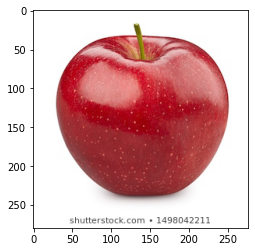

In [13]:
a=imread('https://image.shutterstock.com/image-photo/red-apple-isolated-on-white-260nw-1498042211.jpg')
print(a.shape)
plt.imshow(a)
new=[]
imgresized = resize(a,(50,50,3))
new.append(imgresized.flatten())
new

In [14]:
b=np.array(new)

In [15]:
p=model.predict(b)    #IT SHUD PREDICT apple 
p

array(['apple fruit'], dtype=object)